# Exploratory Notebook

# Testimonal for Microsoft's New Visual Studio

This project is a representation of a suppositional scenario in which Microsoft is entering a business of creating movies. I as a Data Scientist is assigned to help Microsoft decide what type of film they should be creating by translating my findings into actionable insights.

In this notebook I am going to explore the relationship between movie's success and movie's finance, movie's genre, movie'sindustry leading studios. It is my decision to use profit and gross as the predominant indicators of success.  

In [373]:
#importing stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns 
pd.set_option('display.max_rows', 100) 

In [374]:
import sqlite3

In [375]:
con = sqlite3.connect('../zippedData/mahum_db.db')

In [376]:
cursor = con.cursor()

In [377]:
movies_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)

movies_df.head(10)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [378]:
movie_basics = \
"""
SELECT *
FROM movie_basics
"""

In [379]:
movie_df = pd.read_sql("""

SELECT *
FROM movie_basics

""", con)

movie_df.head(21)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [380]:
cursor.execute(movie_basics)

In [381]:
cursor.fetchall()

[('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama'),
 ('tt0066787',
  'One Day Before the Rainy Season',
  'Ashad Ka Ek Din',
  2019,
  114.0,
  'Biography,Drama'),
 ('tt0069049',
  'The Other Side of the Wind',
  'The Other Side of the Wind',
  2018,
  122.0,
  'Drama'),
 ('tt0069204',
  'Sabse Bada Sukh',
  'Sabse Bada Sukh',
  2018,
  None,
  'Comedy,Drama'),
 ('tt0100275',
  'The Wandering Soap Opera',
  'La Telenovela Errante',
  2017,
  80.0,
  'Comedy,Drama,Fantasy'),
 ('tt0111414', 'A Thin Life', 'A Thin Life', 2018, 75.0, 'Comedy'),
 ('tt0112502', 'Bigfoot', 'Bigfoot', 2017, None, 'Horror,Thriller'),
 ('tt0137204',
  'Joe Finds Grace',
  'Joe Finds Grace',
  2017,
  83.0,
  'Adventure,Animation,Comedy'),
 ('tt0139613', 'O Silêncio', 'O Silêncio', 2012, None, 'Documentary,History'),
 ('tt0144449',
  'Nema aviona za Zagreb',
  'Nema aviona za Zagreb',
  2012,
  82.0,
  'Biography'),
 ('tt0146592', 'Pál Adrienn', 'Pál Adrienn', 2010, 136.0, 'Drama'),
 ('tt

In [382]:
cursor.description

(('movie_id', None, None, None, None, None, None),
 ('primary_title', None, None, None, None, None, None),
 ('original_title', None, None, None, None, None, None),
 ('start_year', None, None, None, None, None, None),
 ('runtime_minutes', None, None, None, None, None, None),
 ('genres', None, None, None, None, None, None))

In [383]:
movies_df = pd.read_sql(movie_basics, con)
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [384]:
#identifying duplicates
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    
    return series_vcs

determine_dupes(movie_df['primary_title'])

Amount of unique duplicate movie title: 6182
Total amount of duplicate movie titles: 16255


Home                                 24
Broken                               20
The Return                           20
Alone                                16
Homecoming                           16
                                     ..
Mayor Cupcake                         1
Abortion: A Juggling View             1
Yaaruda Mahesh                        1
Satyarthi                             1
Greater Later: A Cracked Smile FT     1
Name: primary_title, Length: 136071, dtype: int64

In [385]:
movie_df.reset_index(inplace=True)
movie_df.rename(columns={'index' : 'g_unique_id'}, inplace=True)
movie_df


,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [386]:
#creating a new dataframe for duplicate movie titles
title_vcs = pd.Series(movie_df['primary_title'].value_counts())
movie_title = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
movie_title_df = movie_df[movie_df['primary_title'].isin(movie_title)].copy()
movie_title_df


,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery"
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama"
...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


In [387]:
movie_title_df['updated_title'] = movie_title_df['primary_title'] + ' ' + movie_title_df['start_year'].astype(str)
movie_title_df

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",Los pájaros se van con la muerte 2011
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",Godfather 2012
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,Life's a Beach 2012
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",Snowblind 2015
...,...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",Bacchanalia 2017
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",Paradise 2019
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,Albatross 2017
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Drømmeland 2019


In [388]:
determine_dupes(movie_title_df['updated_title'])

Amount of unique duplicate movie title: 1870
Total amount of duplicate movie titles: 3942


Ângelo de Sousa - Tudo o Que Sou Capaz 2010    7
Split 2016                                     6
Inside Out 2011                                5
The Promise 2017                               4
Charlie 2016                                   4
                                              ..
Daddy's Home 2010                              1
Destiny's Bridge 2016                          1
Dangal 2013                                    1
Lady Windermere's Fan 2018                     1
Loners 2018                                    1
Name: updated_title, Length: 14183, dtype: int64

In [389]:
#removing the columns that we need to merge and do not want to dupliacte
remove_columns = ['movie_id', 'primary_title', 'original_title', 'start_year', 'genres', 'runtime_minutes']
movie_title_df.drop(columns=remove_columns, inplace=True)
movie_title_df


,g_unique_id,updated_title
6,6,Bigfoot 2017
19,19,Los pájaros se van con la muerte 2011
21,21,Godfather 2012
30,30,Life's a Beach 2012
34,34,Snowblind 2015
...,...,...
146119,146119,Bacchanalia 2017
146120,146120,Paradise 2019
146125,146125,Albatross 2017
146134,146134,Drømmeland 2019


In [390]:
#merging movie_df and movie_title_df
movie_and_title_df = pd.merge(left=movie_df, right=movie_title_df, on=['g_unique_id'], how ='left')
movie_and_title_df.head(10)

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN


In [391]:
#this will take couple min to load
movie_and_title_df['title_NaN'] = movie_and_title_df['updated_title'].isnull()
movie_and_title_df.head(16)
for movie_index in list(range(len(movie_and_title_df.index))):
    if ~movie_and_title_df.loc[movie_index, 'title_NaN']:
        movie_and_title_df.loc[movie_index, 'primary_title'] = movie_and_title_df.loc[movie_index, 'updated_title']
movie_and_title_df.head(16)

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title,title_NaN
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,True
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,True
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,True
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,True
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,True
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,True
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017,False
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,True
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,True
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,True


In [392]:
#removing unwanted columns
remove_columns = ['g_unique_id','updated_title', 'title_NaN','runtime_minutes']
movie_and_title_df.drop(columns=remove_columns, inplace=True)


In [393]:
movie_and_title_df = movie_and_title_df.copy()
display(movie_and_title_df.head(16))
movie_and_title_df.info()


,movie_id,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,Comedy
6,tt0112502,Bigfoot 2017,Bigfoot,2017,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,Biography


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        146144 non-null  object
 1   primary_title   146144 non-null  object
 2   original_title  146123 non-null  object
 3   start_year      146144 non-null  int64 
 4   genres          140736 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.7+ MB


In [394]:
!ls ../zippedData

bom.movie_gross.csv.gz
im.db.zip
mahum_db
mahum_db.db
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [395]:
#reading csv
bom_gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
rt_info_df = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews_df = pd.read_csv('../zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
tmdb_movies_df = pd.read_csv('../zippedData/tmdb.movies.csv.gz')
tn_movie_budgets_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

In [396]:
#using bom grosstable
bom_gross_df.head(10)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [397]:
bgross_df = bom_gross_df

In [398]:
bgross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [399]:
determine_dupes(bgross_df['title'])

Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


Bluebeard                          2
Paradise: Hope                     1
Stolen (2012)                      1
My Little Pony: The Movie          1
The Secret in their Eyes (2015)    1
                                  ..
Mistress America                   1
Spotlight                          1
Blindspotting                      1
One Week and a Day                 1
The Beguiled (2017)                1
Name: title, Length: 3386, dtype: int64

In [400]:
#using rotten tomato table
rt_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [401]:
rt_df = rt_info_df.copy()

In [402]:
rt_df.drop(columns='id', inplace=True)

In [403]:
#removing unwanted columns
remove_columns = ['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', 'runtime']
rt_df.drop(columns=remove_columns, inplace=True)

In [404]:
rt_df

,genre,director,box_office,studio
0,Action and Adventure|Classics|Drama,William Friedkin,NaN,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,"600,000",Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,NaN,NaN
3,Drama|Mystery and Suspense,Barry Levinson,NaN,NaN
4,Drama|Romance,Rodney Bennett,NaN,NaN
...,...,...,...,...
1555,Action and Adventure|Horror|Mystery and Suspense,NaN,"33,886,034",New Line Cinema
1556,Comedy|Science Fiction and Fantasy,Steve Barron,NaN,Paramount Vantage
1557,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,NaN,NaN


In [405]:
rt_df.rename(columns={'genre' : 'genres'}, inplace=True)
display(rt_df)

,genres,director,box_office,studio
0,Action and Adventure|Classics|Drama,William Friedkin,NaN,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,"600,000",Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,NaN,NaN
3,Drama|Mystery and Suspense,Barry Levinson,NaN,NaN
4,Drama|Romance,Rodney Bennett,NaN,NaN
...,...,...,...,...
1555,Action and Adventure|Horror|Mystery and Suspense,NaN,"33,886,034",New Line Cinema
1556,Comedy|Science Fiction and Fantasy,Steve Barron,NaN,Paramount Vantage
1557,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,NaN,NaN


In [406]:
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [407]:
tmdb_movies_df 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [408]:
tn_movie_budgets_df.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [409]:
#renaming
finance_df = tn_movie_budgets_df

In [410]:
#function for cleaning
def clean_a_money_column(df, series_title):
    
    df[series_title] = df[series_title].astype(str).str.replace('$','')
    df[series_title] = df[series_title].astype(str).str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df

In [411]:
#cleaning
finance_df = clean_a_money_column(finance_df,'worldwide_gross')
finance_df = clean_a_money_column(finance_df,'domestic_gross')
finance_df = clean_a_money_column(finance_df,'production_budget')
display(finance_df)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [412]:
finance_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [413]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [414]:
# finance_df.sort_values(['Profit Margin'], ascending=False, inplace=True) # Sort by largest Profit Margin

numerator = finance_df['worldwide_gross'] - finance_df['production_budget']
finance_df['profit_margin'] = (numerator*100)/finance_df['worldwide_gross']
finance_df.loc[finance_df['profit_margin'] == float('-inf'), 'profit_margin'] = 0
finance_df['ROI'] = finance_df['worldwide_gross']/finance_df['production_budget']


In [415]:
finance_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000


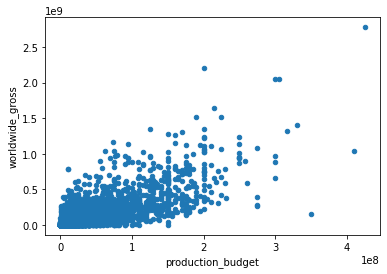

In [416]:
#scatter plot
finance_df.plot('production_budget', 'worldwide_gross', kind='scatter');

In [417]:
finance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 361.5+ KB


In [418]:
#Adding year column
finance_df['year'] = pd.to_numeric(finance_df['release_date'].map(lambda x: x[-4:]))
finance_df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015


In [419]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
 8   year               5782 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 406.7+ KB


In [420]:
#dropping 'id column'
finance_df.drop(columns='id', inplace=True)


In [421]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int64  
 3   domestic_gross     5782 non-null   int64  
 4   worldwide_gross    5782 non-null   int64  
 5   profit_margin      5782 non-null   float64
 6   ROI                5782 non-null   float64
 7   year               5782 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 361.5+ KB


In [422]:
finance_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,85.097242,6.710167,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,68.860947,3.211401,2007
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070,2015


In [423]:
determine_dupes(finance_df['movie'])


Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


Halloween                       3
King Kong                       3
Home                            3
Teenage Mutant Ninja Turtles    2
Crossroads                      2
                               ..
Capote                          1
Submarine                       1
Edmond                          1
Chacun sa nuit                  1
Trees Lounge                    1
Name: movie, Length: 5698, dtype: int64

In [424]:
finance_df.reset_index(inplace=True)
finance_df.rename(columns={'index' : 'finance_unique_id'}, inplace=True)


In [425]:
title_vcs = pd.Series(finance_df['movie'].value_counts())
movie_title = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
movie_title_df = finance_df[finance_df['movie'].isin(movie_title)].copy()
movie_title_df


,finance_unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
26,26,"May 4, 2012",The Avengers,225000000,623279547,1517935897,85.177240,6.746382,2012
38,38,"May 14, 2010",Robin Hood,210000000,105487148,322459006,34.875443,1.535519,2010
39,39,"Dec 14, 2005",King Kong,207000000,218080025,550517357,62.399006,2.659504,2005
50,50,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,80.497149,5.127456,2010
64,64,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,52.433677,2.102328,2017
...,...,...,...,...,...,...,...,...,...
5668,5668,"Nov 16, 1942",Cat People,134000,4000000,8000000,98.325000,59.701493,1942
5676,5676,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,99.621100,263.921614,1968
5677,5677,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,99.000000,100.000000,1915
5699,5699,"Aug 30, 1972",The Last House on the Left,87000,3100000,3100000,97.193548,35.632184,1972


In [426]:
movie_title_df['updated_title'] = movie_title_df['movie'] + ' ' + movie_title_df['year'].astype(str)

In [427]:
determine_dupes(movie_title_df['updated_title'])


Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


Home 2009                             2
Alice in Wonderland 2010              1
Hellboy 2019                          1
Ca$h 2010                             1
The Fog 1980                          1
                                     ..
Peter Pan 1953                        1
The Day the Earth Stood Still 1951    1
Flatliners 1990                       1
Hellboy 2004                          1
Venom 2005                            1
Name: updated_title, Length: 164, dtype: int64

In [428]:
remove_columns = ['release_date', 'movie', 'production_budget', 'domestic_gross',
                  'worldwide_gross', 'profit_margin', 'ROI', 'year']
movie_title_df.drop(columns=remove_columns, inplace=True)

In [429]:
finance_and_dupes_df = pd.merge(left=finance_df, right=movie_title_df, on=['finance_unique_id'], how ='left')


In [430]:
finance_and_dupes_df['title_NaN'] = finance_and_dupes_df['updated_title'].isnull()
finance_and_dupes_df.head(25)
for movie_index in list(range(len(finance_and_dupes_df.index))):
    if ~finance_and_dupes_df.loc[movie_index, 'title_NaN']:
        finance_and_dupes_df.loc[movie_index, 'movie'] = finance_and_dupes_df.loc[movie_index, 'updated_title']

In [431]:
finance_and_dupes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   finance_unique_id  5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
 8   year               5782 non-null   int64  
 9   updated_title      165 non-null    object 
 10  title_NaN          5782 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 662.5+ KB


In [432]:
remove_columns = ['finance_unique_id','updated_title', 'title_NaN']
finance_and_dupes_df.drop(columns=remove_columns, inplace=True)


In [433]:
finance_and_dupes_df = finance_and_dupes_df.copy()
display(finance_and_dupes_df.head(21))
finance_and_dupes_df.info()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,85.097242,6.710167,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,68.860947,3.211401,2007
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070,2015


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int64  
 3   domestic_gross     5782 non-null   int64  
 4   worldwide_gross    5782 non-null   int64  
 5   profit_margin      5782 non-null   float64
 6   ROI                5782 non-null   float64
 7   year               5782 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 566.5+ KB


In [434]:
#merging tn movie data with imdb basic title
movie_and_title_df.rename(columns={'primary_title' : 'movie'}, inplace=True)
display(movie_and_title_df)

,movie_id,movie,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,None


In [435]:
 fd_and_mt_df = pd.merge(left=finance_and_dupes_df, right=movie_and_title_df, on='movie', how ='left')


In [436]:
unaltered_mmt_df = movie_df.copy()
unaltered_mmt_df.rename(columns={'primary_title' : 'movie'}, inplace=True)

In [437]:
fd_and_mt_df = fd_and_mt_df.copy()

In [438]:
fd_and_mt_df = pd.merge(left=fd_and_mt_df, right=unaltered_mmt_df, on='movie', how ='left')


In [439]:
display(fd_and_mt_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6966 entries, 0 to 6965
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       6966 non-null   object 
 1   movie              6966 non-null   object 
 2   production_budget  6966 non-null   int64  
 3   domestic_gross     6966 non-null   int64  
 4   worldwide_gross    6966 non-null   int64  
 5   profit_margin      6966 non-null   float64
 6   ROI                6966 non-null   float64
 7   year               6966 non-null   int64  
 8   movie_id_x         1764 non-null   object 
 9   original_title_x   1764 non-null   object 
 10  start_year_x       1764 non-null   float64
 11  genres_x           1749 non-null   object 
 12  g_unique_id        3423 non-null   float64
 13  movie_id_y         3423 non-null   object 
 14  original_title_y   3422 non-null   object 
 15  start_year_y       3423 non-null   float64
 16  runtime_minutes    2999 

None

In [440]:
fd_and_mt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id_x,original_title_x,start_year_x,genres_x,g_unique_id,movie_id_y,original_title_y,start_year_y,runtime_minutes,genres_y
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,Horror,17060.0,tt1775309,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,"Action,Adventure,Fantasy",6448.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,"Action,Adventure,Sci-Fi",112147.0,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,"Action,Adventure,Sci-Fi",39010.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,"Horror,Sci-Fi,Thriller",127755.0,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
6962,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6963,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6964,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,tt2107644,A Plague So Pleasant,2013.0,"Drama,Horror,Thriller",28674.0,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


In [441]:
determine_dupes(fd_and_mt_df['movie'])

Amount of unique duplicate movie title: 533
Total amount of duplicate movie titles: 1718


The Return        20
Freedom           14
The Journey       11
The Promise       10
Silence           10
                  ..
Daddy Day Care     1
The Heat           1
Harper             1
The FP             1
Trees Lounge       1
Name: movie, Length: 5781, dtype: int64

In [442]:
fd_and_mt_df['is_movie_id_x_NaN'] = fd_and_mt_df['movie_id_x'].isnull()
fd_and_mt_df['is_movie_id_y_NaN'] = fd_and_mt_df['movie_id_y'].isnull()

for movie_index in list(range(len(fd_and_mt_df.index))):
    if (fd_and_mt_df.loc[movie_index, 'is_movie_id_x_NaN']) and (~fd_and_mt_df.loc[movie_index, 'is_movie_id_y_NaN'])\
        and (fd_and_mt_df.loc[movie_index, 'start_year_y'].astype('int64') == fd_and_mt_df.loc[movie_index, 'year']):
            fd_and_mt_df.loc[movie_index, 'movie_id_x'] = fd_and_mt_df.loc[movie_index, 'movie_id_y']
            fd_and_mt_df.loc[movie_index, 'original_title_x'] = fd_and_mt_df.loc[movie_index, 'original_title_y']
            fd_and_mt_df.loc[movie_index, 'start_year_x'] = fd_and_mt_df.loc[movie_index, 'start_year_y']
            fd_and_mt_df.loc[movie_index, 'genres_x'] = fd_and_mt_df.loc[movie_index, 'genres_y']

In [443]:
fd_and_mt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id_x,original_title_x,start_year_x,genres_x,g_unique_id,movie_id_y,original_title_y,start_year_y,runtime_minutes,genres_y,is_movie_id_x_NaN,is_movie_id_y_NaN
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,Horror,17060.0,tt1775309,Abatâ,2011.0,93.0,Horror,False,False
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,"Action,Adventure,Fantasy",6448.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",False,False
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,"Action,Adventure,Sci-Fi",112147.0,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",False,False
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,"Action,Adventure,Sci-Fi",39010.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",False,False
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,"Horror,Sci-Fi,Thriller",127755.0,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",False,False
6962,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
6963,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
6964,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,tt2107644,A Plague So Pleasant,2013.0,"Drama,Horror,Thriller",28674.0,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",False,False


In [444]:
remove_columns = ['is_movie_id_x_NaN', 'is_movie_id_y_NaN', 'movie_id_y', 'original_title_y', 
                  'start_year_y','genres_y']
fd_and_mt_df.drop(columns=remove_columns, inplace=True)

In [445]:
fd_and_mt_df.rename(columns={'movie_id_x': 'movie_id', 'original_title_x': 'original_title',
                                 'start_year_x': 'start_year', 'genres_x': 'genres'}, inplace=True)

In [446]:
display(fd_and_mt_df.head(1))
fd_and_mt_df.shape


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,original_title,start_year,genres,g_unique_id,runtime_minutes
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,Horror,17060.0,93.0


(6966, 14)

In [447]:
remove_columns = ['start_year', 'runtime_minutes' ]
fd_and_mt_df.drop(columns=remove_columns, inplace=True)

In [448]:
fd_and_mt_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,original_title,genres,g_unique_id
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,Horror,17060.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6448.0
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,"Action,Adventure,Sci-Fi",112147.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",39010.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,"Horror,Sci-Fi,Thriller",127755.0
6962,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,NaN,NaN,NaN,NaN
6963,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,NaN,NaN,NaN,NaN
6964,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,tt2107644,A Plague So Pleasant,"Drama,Horror,Thriller",28674.0


In [449]:
bgross_df.rename(columns={'title' : 'movie'}, inplace=True)
display(bgross_df)

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [450]:
fd_mt_bg_df =pd.concat([fd_and_mt_df, bgross_df], axis=0)

In [451]:
fd_mt_bg_df 

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,original_title,genres,g_unique_id,studio,foreign_gross
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009,tt1775309,Abatâ,Horror,17060.0,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6448.0,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,"Action,Adventure,Sci-Fi",112147.0,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",39010.0,NaN,NaN
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,NaN,The Quake,NaN,6200.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,Magn.,NaN
3383,NaN,Edward II (2018 re-release),NaN,4800.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,FM,NaN
3384,NaN,El Pacto,NaN,2500.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,Sony,NaN
3385,NaN,The Swan,NaN,2400.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN,Synergetic,NaN


In [452]:
remove_columns = ['release_date', 'original_title']
fd_mt_bg_df.drop(columns=remove_columns, inplace=True)

In [453]:
fd_mt_bg_df

,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,g_unique_id,studio,foreign_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009,tt1775309,Horror,17060.0,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011,tt1298650,"Action,Adventure,Fantasy",6448.0,NaN,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019,tt6565702,"Action,Adventure,Sci-Fi",112147.0,NaN,NaN
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015,tt2395427,"Action,Adventure,Sci-Fi",39010.0,NaN,NaN
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3382,The Quake,NaN,6200.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,Magn.,NaN
3383,Edward II (2018 re-release),NaN,4800.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,FM,NaN
3384,El Pacto,NaN,2500.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,Sony,NaN
3385,The Swan,NaN,2400.0,NaN,NaN,NaN,2018,NaN,NaN,NaN,Synergetic,NaN


In [454]:
fd_mt_bg_rt_df= pd.concat([fd_mt_bg_df, rt_df])

In [455]:
fd_mt_bg_rt_df

,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,g_unique_id,studio,foreign_gross,director,box_office
0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,Horror,17060.0,NaN,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,tt1298650,"Action,Adventure,Fantasy",6448.0,NaN,NaN,NaN,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,tt6565702,"Action,Adventure,Sci-Fi",112147.0,NaN,NaN,NaN,NaN
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,tt2395427,"Action,Adventure,Sci-Fi",39010.0,NaN,NaN,NaN,NaN
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,75.925058,4.153696,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action and Adventure|Horror|Mystery and Suspense,NaN,New Line Cinema,NaN,NaN,"33,886,034"
1556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy|Science Fiction and Fantasy,NaN,Paramount Vantage,NaN,Steve Barron,NaN
1557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classics|Comedy|Drama|Musical and Performing Arts,NaN,NaN,NaN,Gordon Douglas,NaN
1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy|Drama|Kids and Family|Sports and Fitness,NaN,NaN,NaN,David Mickey Evans,NaN


In [456]:
display(fd_mt_bg_rt_df.head(1))
fd_mt_bg_rt_df.shape


,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,g_unique_id,studio,foreign_gross,director,box_office
0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,Horror,17060.0,NaN,NaN,NaN,NaN


(11913, 14)

In [457]:
fd_mt_bg_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11913 entries, 0 to 1559
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              10353 non-null  object 
 1   production_budget  6966 non-null   float64
 2   domestic_gross     10325 non-null  float64
 3   worldwide_gross    6966 non-null   float64
 4   profit_margin      6966 non-null   float64
 5   ROI                6966 non-null   float64
 6   year               10353 non-null  float64
 7   movie_id           2077 non-null   object 
 8   genres             3610 non-null   object 
 9   g_unique_id        3423 non-null   float64
 10  studio             3876 non-null   object 
 11  foreign_gross      2037 non-null   object 
 12  director           1361 non-null   object 
 13  box_office         340 non-null    object 
dtypes: float64(7), object(7)
memory usage: 1.4+ MB


In [458]:
fd_mt_bg_rt_df_null_values = fd_mt_bg_rt_df['movie_id'].isna().sum()
print(f'Rows with Null Values in movie_id Column: {fd_mt_bg_rt_df_null_values}')

Rows with Null Values in movie_id Column: 9836


In [459]:
fd_mt_bg_rt_df.info

<bound method DataFrame.info of                                             movie  production_budget  \
0                                          Avatar        425000000.0   
1     Pirates of the Caribbean: On Stranger Tides        410600000.0   
2                                    Dark Phoenix        350000000.0   
3                         Avengers: Age of Ultron        330600000.0   
4               Star Wars Ep. VIII: The Last Jedi        317000000.0   
...                                           ...                ...   
1555                                          NaN                NaN   
1556                                          NaN                NaN   
1557                                          NaN                NaN   
1558                                          NaN                NaN   
1559                                          NaN                NaN   

      domestic_gross  worldwide_gross  profit_margin       ROI    year  \
0        760507625.0     2.77

In [460]:
fd_mt_bg_rt_df.dropna(subset=['movie_id'], axis=0, inplace=True)

In [461]:
fd_mt_bg_rt_df

,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,g_unique_id,studio,foreign_gross,director,box_office
0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,Horror,17060.0,NaN,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,tt1298650,"Action,Adventure,Fantasy",6448.0,NaN,NaN,NaN,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,tt6565702,"Action,Adventure,Sci-Fi",112147.0,NaN,NaN,NaN,NaN
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,tt2395427,"Action,Adventure,Sci-Fi",39010.0,NaN,NaN,NaN,NaN
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,tt4154756,"Action,Adventure,Sci-Fi",72820.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,tt6619196,"Comedy,Drama,Horror",112803.0,NaN,NaN,NaN,NaN
6953,Bang,10000.0,527.0,5.270000e+02,-1797.533207,0.052700,1996.0,tt6616538,None,112781.0,NaN,NaN,NaN,NaN
6956,Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,tt1880418,"Comedy,Drama",21418.0,NaN,NaN,NaN,NaN
6961,Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,tt7837402,"Horror,Sci-Fi,Thriller",127755.0,NaN,NaN,NaN,NaN


In [462]:
fd_mt_bg_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 6964
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2077 non-null   object 
 1   production_budget  2077 non-null   float64
 2   domestic_gross     2077 non-null   float64
 3   worldwide_gross    2077 non-null   float64
 4   profit_margin      2077 non-null   float64
 5   ROI                2077 non-null   float64
 6   year               2077 non-null   float64
 7   movie_id           2077 non-null   object 
 8   genres             2058 non-null   object 
 9   g_unique_id        2041 non-null   float64
 10  studio             0 non-null      object 
 11  foreign_gross      0 non-null      object 
 12  director           0 non-null      object 
 13  box_office         0 non-null      object 
dtypes: float64(7), object(7)
memory usage: 243.4+ KB


In [463]:
display(fd_mt_bg_rt_df.head(100))
display(fd_mt_bg_rt_df.info())
pd.set_option('display.max_columns', None)


,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,g_unique_id,studio,foreign_gross,director,box_office
0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,Horror,17060.0,NaN,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,tt1298650,"Action,Adventure,Fantasy",6448.0,NaN,NaN,NaN,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,tt6565702,"Action,Adventure,Sci-Fi",112147.0,NaN,NaN,NaN,NaN
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,tt2395427,"Action,Adventure,Sci-Fi",39010.0,NaN,NaN,NaN,NaN
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,tt4154756,"Action,Adventure,Sci-Fi",72820.0,NaN,NaN,NaN,NaN
8,Justice League,300000000.0,229024295.0,6.559452e+08,54.264473,2.186484,2017.0,tt0974015,"Action,Adventure,Fantasy",515.0,NaN,NaN,NaN,NaN
9,Spectre,300000000.0,200074175.0,8.796209e+08,65.894399,2.932070,2015.0,tt2379713,"Action,Adventure,Thriller",38376.0,NaN,NaN,NaN,NaN
10,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,74.641268,3.943415,2012.0,tt1345836,"Action,Thriller",6900.0,NaN,NaN,NaN,NaN
11,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,30.052383,1.429641,2018.0,tt3778644,"Action,Adventure,Fantasy",66299.0,NaN,NaN,NaN,NaN
12,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-5.768370,0.945462,2013.0,tt1210819,"Action,Adventure,Western",5898.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 6964
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2077 non-null   object 
 1   production_budget  2077 non-null   float64
 2   domestic_gross     2077 non-null   float64
 3   worldwide_gross    2077 non-null   float64
 4   profit_margin      2077 non-null   float64
 5   ROI                2077 non-null   float64
 6   year               2077 non-null   float64
 7   movie_id           2077 non-null   object 
 8   genres             2058 non-null   object 
 9   g_unique_id        2041 non-null   float64
 10  studio             0 non-null      object 
 11  foreign_gross      0 non-null      object 
 12  director           0 non-null      object 
 13  box_office         0 non-null      object 
dtypes: float64(7), object(7)
memory usage: 243.4+ KB


None

In [464]:
remove_columns = ['g_unique_id']
fd_mt_bg_rt_df.drop(columns=remove_columns, inplace=True)

In [465]:
fd_mt_bg_rt_df

,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,studio,foreign_gross,director,box_office
0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,Horror,NaN,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,tt1298650,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,tt6565702,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,tt2395427,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,tt4154756,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,tt6619196,"Comedy,Drama,Horror",NaN,NaN,NaN,NaN
6953,Bang,10000.0,527.0,5.270000e+02,-1797.533207,0.052700,1996.0,tt6616538,None,NaN,NaN,NaN,NaN
6956,Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,tt1880418,"Comedy,Drama",NaN,NaN,NaN,NaN
6961,Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,tt7837402,"Horror,Sci-Fi,Thriller",NaN,NaN,NaN,NaN


In [466]:
fd_mt_bg_rt_df_null_values = fd_mt_bg_rt_df['genres'].isna().sum()
print(f'Rows with Null Values in genres Column: {fd_mt_bg_rt_df_null_values}')
NaN_in_fd_mt_bg_rt_df = fd_mt_bg_rt_df[fd_mt_bg_rt_df['genres'].isnull()]
NaN_in_fd_mt_bg_rt_df


Rows with Null Values in genres Column: 19


,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,studio,foreign_gross,director,box_office
447,Robin Hood 2018,99000000.0,30824628.0,84747441.0,-16.817687,0.856035,2018.0,tt6858500,None,NaN,NaN,NaN,NaN
1178,Instinct,55000000.0,34105207.0,34105207.0,-61.265698,0.620095,1999.0,tt4551096,None,NaN,NaN,NaN,NaN
1409,The Ring,48000000.0,129094024.0,248218486.0,80.662198,5.171218,2002.0,tt10453170,None,NaN,NaN,NaN,NaN
1489,The Bounty Hunter,45000000.0,67061228.0,135808837.0,66.865190,3.017974,2010.0,tt1472211,None,NaN,NaN,NaN,NaN
3197,The Touch,20000000.0,0.0,5918742.0,-237.909644,0.295937,2004.0,tt6962340,None,NaN,NaN,NaN,NaN
3373,The Prince,18000000.0,0.0,0.0,0.000000,0.000000,2014.0,tt3918106,None,NaN,NaN,NaN,NaN
3539,Home Alone,15000000.0,285761243.0,476684675.0,96.853266,31.778978,1990.0,tt6419610,None,NaN,NaN,NaN,NaN
3952,Rogue City,13000000.0,0.0,0.0,0.000000,0.000000,2019.0,tt10329540,None,NaN,NaN,NaN,NaN
4215,The Grudge,10000000.0,110359362.0,187281115.0,94.660433,18.728112,2004.0,tt10443830,None,NaN,NaN,NaN,NaN
4713,Swimming Pool,7800000.0,10130108.0,24021282.0,67.528794,3.079652,2003.0,tt6419386,None,NaN,NaN,NaN,NaN


In [467]:
fd_mt_bg_rt_df.dropna(subset=['genres'], axis=0, inplace=True)
fd_mt_bg_rt_df

,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,studio,foreign_gross,director,box_office
0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,Horror,NaN,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,tt1298650,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,tt6565702,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,tt2395427,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,tt4154756,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6944,Stories of Our Lives,15000.0,0.0,0.000000e+00,0.000000,0.000000,2014.0,tt3973612,Drama,NaN,NaN,NaN,NaN
6949,Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,tt6619196,"Comedy,Drama,Horror",NaN,NaN,NaN,NaN
6956,Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,tt1880418,"Comedy,Drama",NaN,NaN,NaN,NaN
6961,Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,tt7837402,"Horror,Sci-Fi,Thriller",NaN,NaN,NaN,NaN


In [468]:
#data cleaning
fd_mt_bg_rt_df.loc[fd_mt_bg_rt_df['movie'] == 'Avatar', 'genres'] = "Action,Adventure,Fantasy"


In [469]:
fd_mt_bg_rt_df.reset_index(inplace=True)
fd_mt_bg_rt_df.rename(columns={'index' : 'unique_id'}, inplace=True)
fd_mt_bg_rt_df


,unique_id,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,studio,foreign_gross,director,box_office
0,0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN
1,1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,tt1298650,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN
2,2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,tt6565702,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
3,3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,tt2395427,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
4,6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,tt4154756,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,6944,Stories of Our Lives,15000.0,0.0,0.000000e+00,0.000000,0.000000,2014.0,tt3973612,Drama,NaN,NaN,NaN,NaN
2054,6949,Clean,10000.0,138711.0,1.387110e+05,92.790766,13.871100,2006.0,tt6619196,"Comedy,Drama,Horror",NaN,NaN,NaN,NaN
2055,6956,Newlyweds,9000.0,4584.0,4.584000e+03,-96.335079,0.509333,2012.0,tt1880418,"Comedy,Drama",NaN,NaN,NaN,NaN
2056,6961,Red 11,7000.0,0.0,0.000000e+00,0.000000,0.000000,2018.0,tt7837402,"Horror,Sci-Fi,Thriller",NaN,NaN,NaN,NaN


In [470]:
determine_dupes(fd_mt_bg_rt_df['movie'])

Amount of unique duplicate movie title: 47
Total amount of duplicate movie titles: 104


The Promise             4
Redemption              4
Home 2015               4
The Wall                3
The Circle              3
                       ..
Ant-Man and the Wasp    1
A Quiet Place           1
American Sniper         1
Tulip Fever             1
Second Act              1
Name: movie, Length: 2001, dtype: int64

In [471]:
series_vcs = pd.Series(fd_mt_bg_rt_df['movie'].value_counts())
series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
sorted(series_dupes)


['A Better Life',
 'Abduction',
 'Absentia',
 'Addicted',
 'After',
 'Alice in Wonderland 2010',
 'Big Eyes',
 'Brotherly Love',
 'Brothers 2015',
 'Burlesque',
 'Cinderella 2015',
 'Coco',
 'Cyrus',
 'Denial',
 'Destiny',
 'Heist 2015',
 'Hercules 2014',
 'Highway',
 'Home 2015',
 'Homefront',
 'Hush',
 'Joe',
 'Leap Year',
 'Let There Be Light',
 'Lights Out',
 'Phantom',
 'Redemption',
 'Sisters',
 'Spotlight',
 'Stronger',
 'The Artist',
 'The Call',
 'The Circle',
 'The Darkness',
 'The Family',
 'The Forest',
 'The Night Before',
 'The Prince',
 'The Promise',
 'The Square 2013',
 'The Tempest',
 'The Walk',
 'The Wall',
 'Treachery',
 'Truth or Dare',
 'Underdogs',
 'Weekend']

In [472]:
finance_df['mmdf_uni_id'] = finance_df.index


In [473]:
finance_df['Profit Margin']= (finance_df['worldwide_gross']-finance_df['production_budget'])/finance_df['worldwide_gross']
finance_df['ROI'] = (finance_df['worldwide_gross']/finance_df['production_budget'])

In [474]:
finance_df=finance_df.sort_values(['Profit Margin'], ascending=False)

In [475]:
finance_df = finance_df[finance_df['worldwide_gross'] != 0]

In [476]:
determine_dupes(fd_mt_bg_rt_df['movie'])

Amount of unique duplicate movie title: 47
Total amount of duplicate movie titles: 104


The Promise             4
Redemption              4
Home 2015               4
The Wall                3
The Circle              3
                       ..
Ant-Man and the Wasp    1
A Quiet Place           1
American Sniper         1
Tulip Fever             1
Second Act              1
Name: movie, Length: 2001, dtype: int64

In [477]:
fd_mt_bg_rt_df.drop_duplicates(subset="movie",
                     keep=False, inplace=True)

In [478]:
determine_dupes(fd_mt_bg_rt_df['movie'])

Amount of unique duplicate movie title: 0
Total amount of duplicate movie titles: 0


Welcome to Marwen                   1
ParaNorman                          1
Sabotage                            1
Hot Tub Time Machine 2              1
R100                                1
                                   ..
Eddie: The Sleepwalking Cannibal    1
Happy 40th                          1
Water & Power                       1
Lawless                             1
Second Act                          1
Name: movie, Length: 1954, dtype: int64

In [479]:
fd_mt_bg_rt_df['genres'] = fd_mt_bg_rt_df['genres'].map(lambda x: x.split(','))


In [480]:
fd_mt_bg_rt_df.head(100)

,unique_id,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,movie_id,genres,studio,foreign_gross,director,box_office
0,0,Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,tt1775309,"[Action, Adventure, Fantasy]",NaN,NaN,NaN,NaN
1,1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,tt1298650,"[Action, Adventure, Fantasy]",NaN,NaN,NaN,NaN
2,2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,tt6565702,"[Action, Adventure, Sci-Fi]",NaN,NaN,NaN,NaN
3,3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,tt2395427,"[Action, Adventure, Sci-Fi]",NaN,NaN,NaN,NaN
4,6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,tt4154756,"[Action, Adventure, Sci-Fi]",NaN,NaN,NaN,NaN
5,8,Justice League,300000000.0,229024295.0,6.559452e+08,54.264473,2.186484,2017.0,tt0974015,"[Action, Adventure, Fantasy]",NaN,NaN,NaN,NaN
6,9,Spectre,300000000.0,200074175.0,8.796209e+08,65.894399,2.932070,2015.0,tt2379713,"[Action, Adventure, Thriller]",NaN,NaN,NaN,NaN
7,10,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,74.641268,3.943415,2012.0,tt1345836,"[Action, Thriller]",NaN,NaN,NaN,NaN
8,11,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,30.052383,1.429641,2018.0,tt3778644,"[Action, Adventure, Fantasy]",NaN,NaN,NaN,NaN
9,12,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-5.768370,0.945462,2013.0,tt1210819,"[Action, Adventure, Western]",NaN,NaN,NaN,NaN


In [481]:

fd_mt_bg_rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          1954 non-null   int64  
 1   movie              1954 non-null   object 
 2   production_budget  1954 non-null   float64
 3   domestic_gross     1954 non-null   float64
 4   worldwide_gross    1954 non-null   float64
 5   profit_margin      1954 non-null   float64
 6   ROI                1954 non-null   float64
 7   year               1954 non-null   float64
 8   movie_id           1954 non-null   object 
 9   genres             1954 non-null   object 
 10  studio             0 non-null      object 
 11  foreign_gross      0 non-null      object 
 12  director           0 non-null      object 
 13  box_office         0 non-null      object 
dtypes: float64(6), int64(1), object(7)
memory usage: 229.0+ KB
